## Simulating LSST-like image time-series of lensed type Ia supernovae

### Import python libraries, LSST characteristics and functions

In [1]:
from class_LSST import LSST
from image_time_series import simulate_time_series_images
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Parameter distributions 

Sample $z_l$, $z_s$ and $\theta_E$ from MC sample from Wojtak et al. (2019).


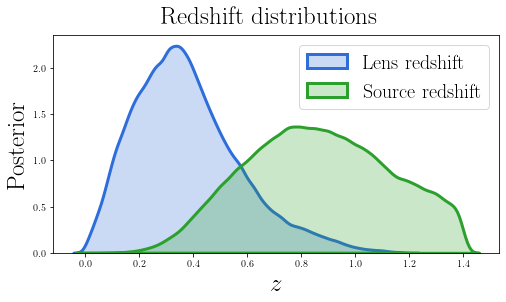

In [2]:
lsst = LSST(bandpass='i')

z_source_list_, z_lens_list_, theta_E_list_ = lsst.get_z_theta(theta_min=0.1)

lsst.plot_redshifts(z_lens_list_, z_source_list_)

### Cadence

Sample the inter-night gaps from the predicted distribution for the <b> baseline2018a </b> observing strategy for the LSST Wide, Fast, Deep survey in the $i$-band.


Median inter-night gap:  6.9835000000020955


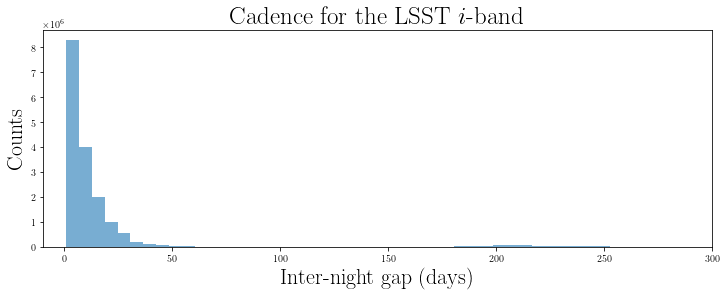

In [3]:
inter_night_gap = lsst.get_inter_night_gap()
print("Median inter-night gap: ", np.median(inter_night_gap))

lsst.plot_inter_night_gap(inter_night_gap)

### Generation of training and test sets


  0%|          | 0/1 [00:00<?, ?it/s]

 
Peak brightness images: [23.08775085 23.55855086]
Time delays:  [ 0.         60.25059351] days
Macro magnification:  [2.8027925  3.08962332]
Microlensing contribution at peak (magnitudes):  [0.06 0.53]
Lens redshift:  0.3678614182564796
Supernova redshift:  0.889707541388264
Einstein radius:  0.8729178919474635
Hubble constant:  52.102816050860916
Time-delay distance:  3685.399061724688
 


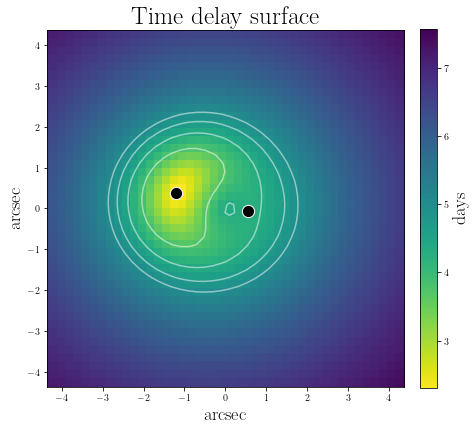

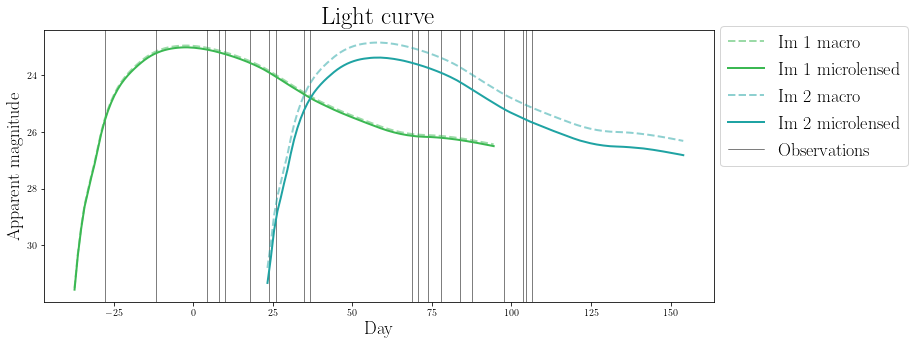

100%|██████████| 1/1 [00:18<00:00, 18.60s/it]


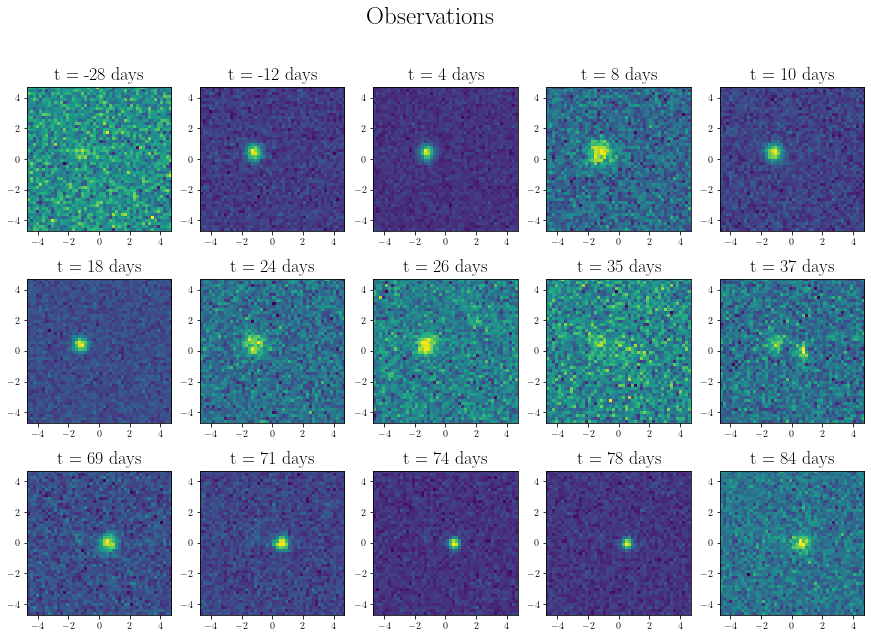

100%|██████████| 1/1 [00:09<00:00,  9.99s/it]

Done!
Simulating images took  10.0 seconds ( 0.0 hours) to complete.
Number of image-time series generated:  1
Number of configurations tried:  1
Number of attempts:  12
 
                                         time_series  z_source    z_lens  \
0  [[[2.9414431956441494, -4.319208626829404, 9.5...  0.889708  0.367861   

          H0   theta_E                        peak_brightness_im  \
0  52.102816  0.872918  [23.087750847064825, 23.558550861514732]   

                                 macro_mag  source_x  source_y  \
0  [2.8027925044454367, 3.089623315033208] -0.304613  0.089045   

                  time_delay  ...   e1_lens   e2_lens  \
0  [0.0, 60.250593513222896]  ... -0.023617  0.140316   

                                         time_stamps  g1_shear  g2_shear  \
0  [0.0, 16.086600000002363, 32.03550000000541, 3...  0.035601  0.023434   

                                 micro_kappa  \
0  [0.33957658449012906, 0.7463344589440055]   

                                micro_ga

In [6]:
num_samples = 1               # Total number of lens systems to be generated  
batch_size = 1                # Number of lens systems that is saved together in a batch
batch = 1                     # Starting number of the batch
num_images = 2                # Choose between 2 (for doubles) and 4 (for quads)
bandpass = 'i'                # Choose between 'r', 'i' or 'z'
obs_upper_limit = 20          # Upper limit of number of observations
obs_lower_limit = 5           # Lower limit of number of observations
fixed_H0 = False              # Bool, if False: vary H0. if True: fix H0 to 70 km/s/Mpc (for the evaluation set)
add_microlensing = True       # Bool, if False: Only macro magnification. if True: Add effects of microlensing
Show = True                   # Bool, if True: Show figures and print information about the lens systems
Save = False                  # Bool, if True: Save image time-series
path = "Cadence_microlensing_trainingset_doubles_2/"                 # Path to folder in which to save the results


simulate_time_series_images(batch_size, batch,  num_samples, num_images, inter_night_gap, z_source_list_, z_lens_list_, 
                            theta_E_list_, lsst, bandpass, add_microlensing, obs_lower_limit, obs_upper_limit, 
                            fixed_H0, Show, Save, path)
